In [11]:
from __future__ import print_function, division
from future.utils import iteritems
from builtins import range

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from wordcloud import WordCloud

In [12]:
df = pd.read_csv('dataset_sms_spam.csv', encoding='ISO-8859-1')
df = df.drop(["Unnamed: 2", "Unnamed: 3", "Unnamed: 4"], axis=1)
df.columns = ['labels', 'data']

# Create binary labels
df['b_labels'] = df['labels'].map({'ham': 0, 'spam': 1})
Y = df['b_labels'].values

# Split up the data
df_train, df_test, Ytrain, Ytest = train_test_split(df['data'], Y, test_size=0.33)

# Calculate features
tfidf = TfidfVectorizer(decode_error='ignore')
Xtrain = tfidf.fit_transform(df_train)
Xtest = tfidf.transform(df_test)

# count_vectorizer = CountVectorizer(decode_error='ignore')
# Xtrain = count_vectorizer.fit_transform(df_train)
# Xtest = count_vectorizer.transform(df_test)

train score: 0.9742834181623359
test score: 0.9543230016313213


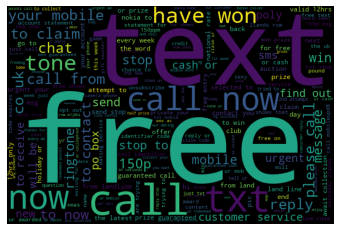

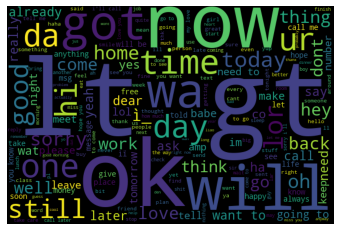

In [13]:
# Create and train the model
model = MultinomialNB()
model.fit(Xtrain, Ytrain)
print("train score:", model.score(Xtrain, Ytrain))
print("test score:", model.score(Xtest, Ytest))

# Visualize the data
def visualize(label):
  words = ''
  for msg in df[df['labels'] == label]['data']:
    msg = msg.lower()
    words += msg + ' '
  wordcloud = WordCloud(width=600, height=400).generate(words)
  plt.imshow(wordcloud)
  plt.axis('off')
  plt.show()

visualize('spam')
visualize('ham')

In [14]:
# Check the results
X = tfidf.transform(df['data'])
df['predictions'] = model.predict(X)

# Should be spam
sneaky_spam = df[(df['predictions'] == 0) & (df['b_labels'] == 1)]['data']
for msg in sneaky_spam:
  print(msg)

# Should not be spam
not_actually_spam = df[(df['predictions'] == 1) & (df['b_labels'] == 0)]['data']
for msg in not_actually_spam:
  print(msg)

FreeMsg Hey there darling it's been 3 week's now and no word back! I'd like some fun you up for it still? Tb ok! XxX std chgs to send, å£1.50 to rcv
Thanks for your subscription to Ringtone UK your mobile will be charged å£5/month Please confirm by replying YES or NO. If you reply NO you will not be charged
Did you hear about the new \Divorce Barbie\"? It comes with all of Ken's stuff!"
You'll not rcv any more msgs from the chat svc. For FREE Hardcore services text GO to: 69988 If u get nothing u must Age Verify with yr network & try again
-PLS STOP bootydelious (32/F) is inviting you to be her friend. Reply YES-434 or NO-434 See her: www.SMS.ac/u/bootydelious STOP? Send STOP FRND to 62468
BangBabes Ur order is on the way. U SHOULD receive a Service Msg 2 download UR content. If U do not, GoTo wap. bangb. tv on UR mobile internet/service menu
Will u meet ur dream partner soon? Is ur career off 2 a flyng start? 2 find out free, txt HORO followed by ur star sign, e. g. HORO ARIES
U 44780